In [1]:
import pandas as pd 
import numpy as np
import os 
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt


# Analyse MF4 data after parsing

This notebook serves to analyse the MF4 parsed data before the processing pipeline. 

Objective: 

1. Trend of missing data
2. Are the context signals reliable 

In [2]:
vehicle_names = ["SEB880", "SEB882", "SEB883", "SEB885", "SEB888", "SEB889"]
#vehicle_names = ["SEB880", "SEB882", "SEB883"]

df = pd.DataFrame() 

for vehicle in vehicle_names:
    path = os.path.join(f"../Parsed_data_new/{vehicle}" , f"{vehicle}_mf4.parquet")
    df_curr = pd.read_parquet(path)
    df = pd.concat([df, df_curr], ignore_index=True)
print(df.shape)
df = df.replace('nan', np.nan)

# #path_1 = os.path.join("../Parsed_data/SEB880" , "SEB880_mf4.parquet")
# path_1 = os.path.join("../Parsed_data_new/SEB880" , "SEB880_mf4.parquet")
# path_2 = os.path.join("../Parsed_data_new/SEB883" , "SEB883_mf4.parquet")

# df_1 = pd.read_parquet(path_1)
# df_2 = pd.read_parquet(path_2)

(16169127, 47)


In [12]:
df.keys()

columns_to_drop = ['MO_drive_mode', 'steering_angle']
df = df.drop(columns=columns_to_drop)

new_column_names = {
    'Drowsiness_driver': 'drowsiness',
    'time_gap_front_vehicle': 'time gap f-vehicle',
    'ESP_speed': 'esp_speed',
    'KBI_speed': 'kbi_speed',
    'CHA_MO_drive_mode': 'drive_mode_mo',
    'CHA_ESP_drive_mode': 'drive mode esp',
}

df = df.rename(columns=new_column_names)

In [13]:
# Calculate the count of missing values in each column
missing_counts = df.isnull().sum()
# Sort the columns based on the count of missing values in ascending order
df = df[missing_counts.sort_values(ascending=False).index]

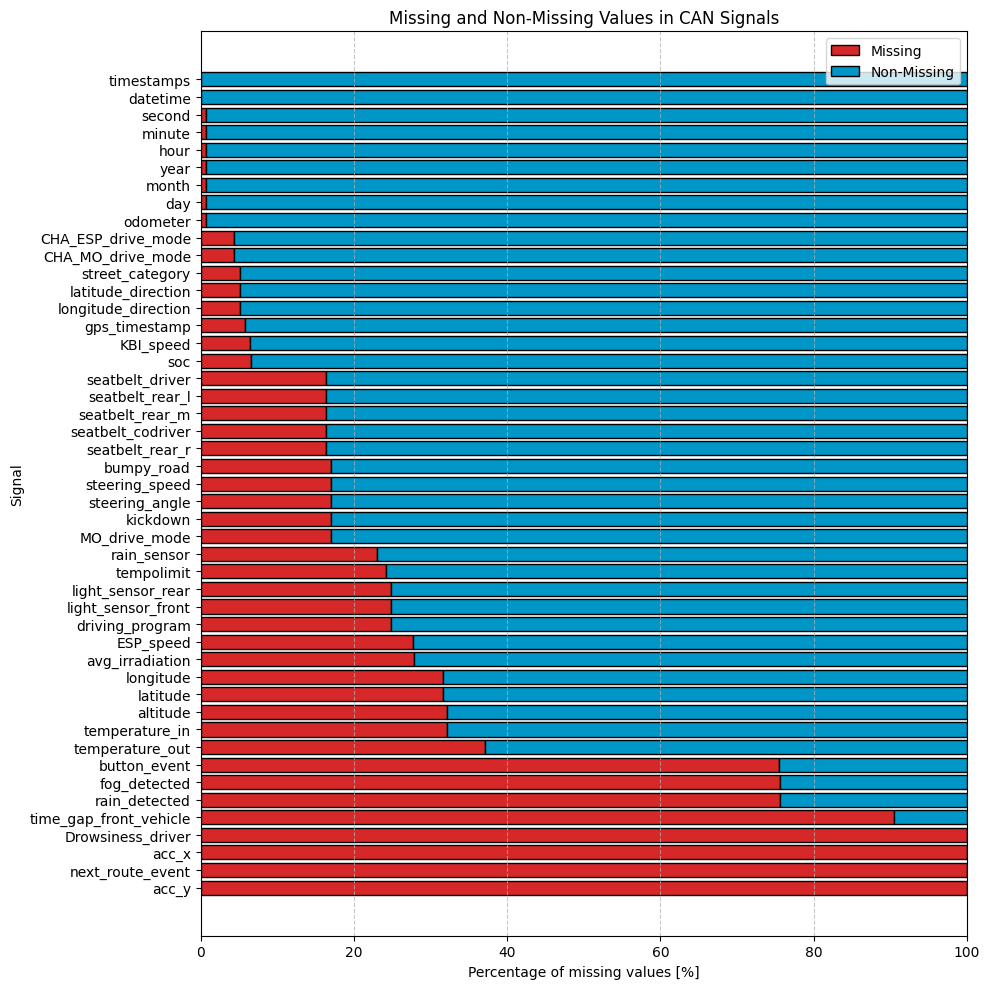

In [57]:
plt.figure(figsize=(10, 10))


colors = ['#d62828', '#0096c7']

for i, context in enumerate(df.keys()):
    
    df_context = df[context]

    missing_values_count = df_context.isnull().sum() / len(df_context) *100
    non_missing_values_count = df_context.notnull().sum() / len(df_context) *100

    if i == 0:
        # Create a horizontal stacked bar chart
        p1 = plt.barh(context, missing_values_count, color=colors[0], edgecolor='black', label='Missing')
        p2 = plt.barh(context, non_missing_values_count, left=missing_values_count, color=colors[1], edgecolor='black', label='Non-Missing')
    else:
        # Create a horizontal stacked bar chart
        p1 = plt.barh(context, missing_values_count, color=colors[0], edgecolor='black')
        p2 = plt.barh(context, non_missing_values_count, left=missing_values_count, color=colors[1], edgecolor='black')


# Customize the plot
plt.title('Missing and Non-Missing Values in CAN Signals', fontsize=16)
plt.xlabel('Percentage of missing values [%]')
plt.ylabel('Signal')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
# Calculate missing and non-missing percentages
missing_percentages = df.isnull().mean() * 100
non_missing_percentages = 100 - missing_percentages

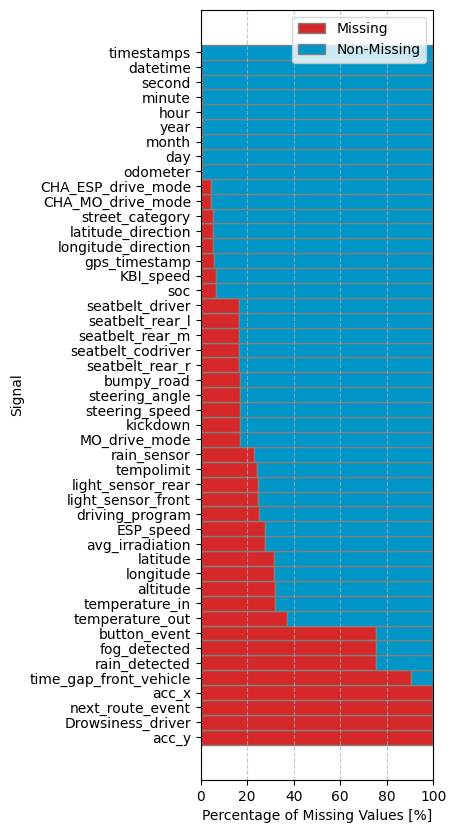

In [7]:
# Colors for the bars
colors = ['#d62828', '#0096c7']

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(3, 10))

bar_layout = {'align': 'edge', 'gap': 0.1}

bar_width = 1

# Plot the stacked bar chart
p1 = ax.barh(missing_percentages.index, missing_percentages, height=bar_width,  color=colors[0], edgecolor='gray', label='Missing')
p2 = ax.barh(non_missing_percentages.index, non_missing_percentages, height=bar_width, left=missing_percentages, color=colors[1], edgecolor='gray', label='Non-Missing')

# Customize the plot
#ax.set_title('Missing and Non-Missing Values in CAN Signals', fontsize=16)
ax.set_xlabel('Percentage of Missing Values [%]')
ax.set_ylabel('Signal')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7)

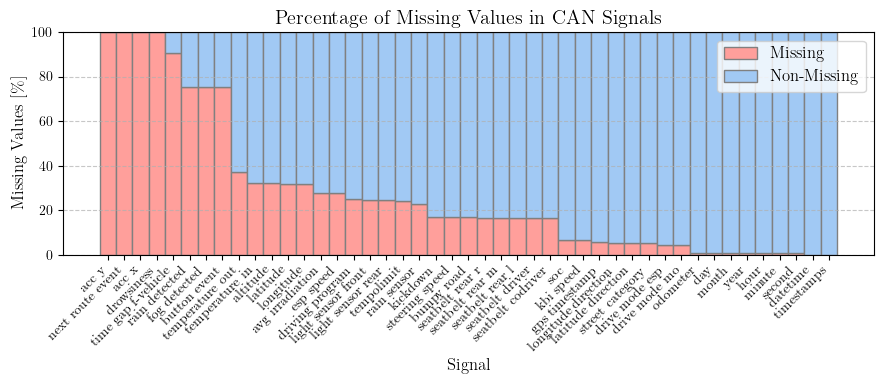

In [22]:
# Colors for the bars
colors = ['#d62828', '#0096c7']



plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 12,  # Adjust the font size for all elements
    "axes.labelsize": 12,  # Font size of axis labels
    "xtick.labelsize": 10,  # Font size of x-axis tick labels
    "ytick.labelsize": 10,  # Font size of y-axis tick labels
    "legend.fontsize": 12,  # Font size of legend
    "figure.titlesize": 17,  # Font size of figure title
})

# modify signal names
modified_labels = []
for signal_name in missing_percentages.index:
    # Remove underscores and replace names as needed
    modified_label = signal_name.replace("_", " ")
    modified_labels.append(modified_label)

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(9, 4))

bar_layout = {'align': 'edge', 'gap': 0.1}

bar_height = 1

sns.set_palette("pastel")

# Plot the stacked bar chart
p1 = ax.bar(missing_percentages.index, missing_percentages, width=bar_height, edgecolor='gray', label='Missing', color=sns.color_palette()[3]) #color=colors[0]
p2 = ax.bar(non_missing_percentages.index, non_missing_percentages, bottom=missing_percentages, width=bar_height,  edgecolor='gray', label='Non-Missing', color=sns.color_palette()[0]) #color=colors[1],

# Customize the plot
ax.set_xticks(range(len(modified_labels)))
ax.set_xticklabels(modified_labels, rotation=45, ha='right')
ax.set_title('Percentage of Missing Values in CAN Signals')
ax.set_xlabel('Signal')
ax.set_ylabel('Missing Values [\%]')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Invert y-axis to have signals at the top
#ax.invert_yaxis()

#ax.set_xticklabels(missing_percentages.index, rotation=45, ha='right')

plt.tight_layout()

plt.savefig("/Users/wannerje/Dropbox/Porsche/eth_report/Img/nan_percentage.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [60]:
# Adjust figure size
#fig.set_size_inches(12, 8)

# Adjust font size for title, labels, and legend
ax.set_title('Adjusted Title', fontsize=16)
ax.set_xlabel('Adjusted X Label', fontsize=12)
ax.set_ylabel('Adjusted Y Label', fontsize=12)
ax.legend(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [4]:

# Create a binary color palette for missing and non-missing values
cmap = ListedColormap(['#0096c7', '#d62828'])

#df_here = df #.copy()#[:100]

# Create the Missing Value Heatmap with horizontal orientation, binary color palette, and grid
plt.figure(figsize=(15, 11))


ax = sns.heatmap(df.isnull().T, cmap=cmap, cbar=False)
ax.invert_yaxis()
# Create a custom legend for "Missing" and "Non-Missing"
legend_labels = ['Non-Missing', 'Missing']
colors = [cmap(0), cmap(1)]
legend_elements = [plt.Line2D([0], [0], marker='s', color=color, label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, colors)]
# Add the legend to the plot
ax.legend(handles=legend_elements) # loc='center left', bbox_to_anchor=(1, 0.5)

# Add horizontal lines to separate the signals
for i in range(1, len(df.columns)):
    ax.hlines(i, 0, len(df), colors='gray', linewidth=0.5)

plt.title('Missing Values per row index in CAN Signals', fontsize=25)

plt.ylabel('Signal', fontsize=14)
plt.xlabel('Row Index', fontsize=14)
#plt.legend()
#ax.set_yticklabels([])
#ax.set_xticklabels([])



plt.show()


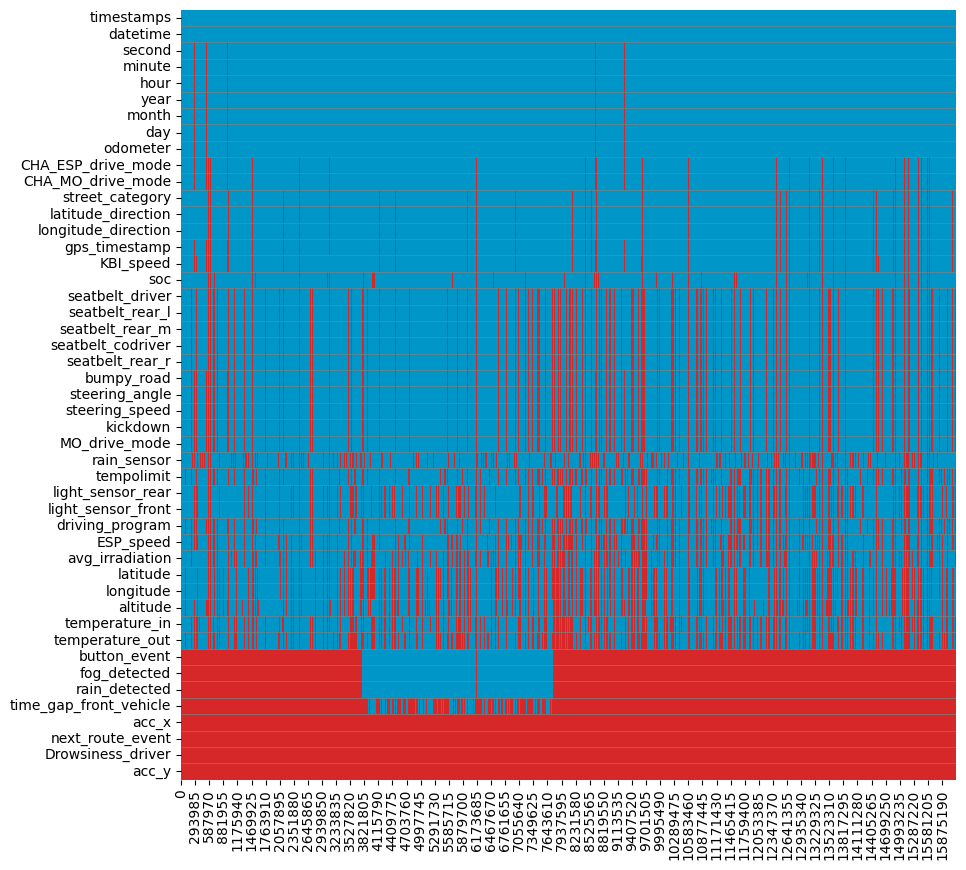

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a binary color palette for missing and non-missing values
cmap = ListedColormap(['#0096c7', '#d62828'])

# Create the Missing Value Heatmap with horizontal orientation, binary color palette, and grid
plt.figure(figsize=(10, 10))

heatmap_ax = sns.heatmap(df.isnull().T, cmap=cmap, cbar=False)
heatmap_ax.invert_yaxis()

# Add horizontal lines to separate the signals
for i in range(1, len(df.columns)):
    heatmap_ax.hlines(i, 0, len(df), colors='gray', linewidth=0.5)


# Analyze each variable 

In [46]:
def var_info(var_name):
    print(var_name)
    var = df[var_name]
    print(f"[{var.min()},{var.max()}]")
    print(f"is nan: {round(var.isna().sum() / len(var), 2)*100} %")
    print(var.value_counts())
    print('\n')

In [48]:
df.keys()

Index(['acc_y', 'Drowsiness_driver', 'next_route_event', 'acc_x',
       'time_gap_front_vehicle', 'rain_detected', 'fog_detected',
       'button_event', 'temperature_out', 'temperature_in', 'altitude',
       'longitude', 'latitude', 'avg_irradiation', 'ESP_speed',
       'driving_program', 'light_sensor_front', 'light_sensor_rear',
       'tempolimit', 'rain_sensor', 'MO_drive_mode', 'kickdown',
       'steering_speed', 'steering_angle', 'bumpy_road', 'seatbelt_rear_r',
       'seatbelt_codriver', 'seatbelt_rear_m', 'seatbelt_rear_l',
       'seatbelt_driver', 'soc', 'KBI_speed', 'gps_timestamp',
       'longitude_direction', 'latitude_direction', 'street_category',
       'CHA_MO_drive_mode', 'CHA_ESP_drive_mode', 'odometer', 'day', 'month',
       'year', 'hour', 'minute', 'second', 'datetime', 'timestamps'],
      dtype='object')

In [49]:
var_info("acc_y")

acc_y
[nan,nan]
is nan: 100.0 %
Series([], Name: count, dtype: int64)




In [41]:
var_info(df.keys()[0])

acc_y
is nan: 100.0 %
Series([], Name: count, dtype: int64)




In [45]:
var_info(df.keys()[1])

Drowsiness_driver
is nan: 100.0 %
Series([], Name: count, dtype: int64)




In [47]:
var_info(df.keys()[2])

acc_x
is nan: 100.0 %
Series([], Name: count, dtype: int64)




In [51]:
var_info(df.keys()[3])

acc_x
is nan: 100.0 %
Series([], Name: count, dtype: int64)




In [49]:
var_info(df.keys()[4])

time_gap_front_vehicle
is nan: 91.0 %
time_gap_front_vehicle
0.9              828115
keine_Anzeige    703866
Name: count, dtype: int64




In [50]:
var_info(df.keys()[5])

rain_detected
is nan: 76.0 %
rain_detected
Licht_nicht_angefordert    3951367
Name: count, dtype: int64




In [52]:
var_info(df.keys()[6])

fog_detected
is nan: 76.0 %
fog_detected
Licht_nicht_angefordert    3951367
Name: count, dtype: int64




In [53]:
var_info(df.keys()[7])

button_event
is nan: 76.0 %
button_event
Key_Released__No_Key          3953373
Startup_Reset                    2303
Volume_Up__Down_ThumbWheel        400
Main_Menu                          91
Hook                               74
MAP                                47
Up__Down_ThumbWheel                45
Cancel__Escape                     36
Tube_Toggle                        29
PTT__PushToTalk                    22
Joker1                             11
Rekuperation                       10
Mute                                5
Name: count, dtype: int64




In [56]:
var_info(df.keys()[8])

temperature_out
is nan: 37.0 %
temperature_out
9.0                    256608
10.0                   243374
12.5                   240680
6.0                    240380
8.5                    227671
                        ...  
-2.8089360541358936         1
-2.6699910419364965         1
-3.128495288011829          1
-3.283877749854227          1
0.18801015780883623         1
Name: count, Length: 95584, dtype: int64




In [55]:
var_info(df.keys()[9])

temperature_in
is nan: 32.0 %
temperature_in
24.5                  530361
25.0                  518613
25.5                  497279
26.0                  481966
26.5                  472441
                       ...  
23.071262061775077         1
23.177758345874665         1
23.427668503173113         1
23.323500613279815         1
15.326517675303112         1
Name: count, Length: 408583, dtype: int64




In [54]:
var_info(df.keys()[10])

altitude
is nan: 32.0 %
altitude
Init                  1835603
472.0                  127071
474.0                  122432
476.0                  121824
470.0                  116169
                       ...   
296.8904571660008           1
294.8907601506563           1
292.8910629915354           1
290.89126389589177          1
324.59443732084037          1
Name: count, Length: 1484804, dtype: int64


